In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('netflix_titles.csv')

In [4]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [6]:
print(df.isnull().sum())

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


Cleaning the Data


In [7]:
# Handling missing values
# Convert date_added to datetime
df['date_added'] = pd.to_datetime(df['date_added'], format='mixed')

In [8]:
# fill missing country,rating,cast and director with unknown
df['country'].fillna('Unknown',inplace=True)
df['rating'].fillna('Unknown',inplace=True)
df['cast'].fillna('Unknown',inplace = True)
df['director'].fillna('Unknown',inplace = True)

df.dropna(subset=['date_added'],inplace = True)
df.dropna(subset = ['duration'],inplace = True)

/tmp/ipython-input-8-1125398848.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['country'].fillna('Unknown',inplace=True)
/tmp/ipython-input-8-1125398848.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

In [9]:
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,0
cast,0
country,0
date_added,0
release_year,0
rating,0
duration,0


1. Number of Movies vs TV Shows

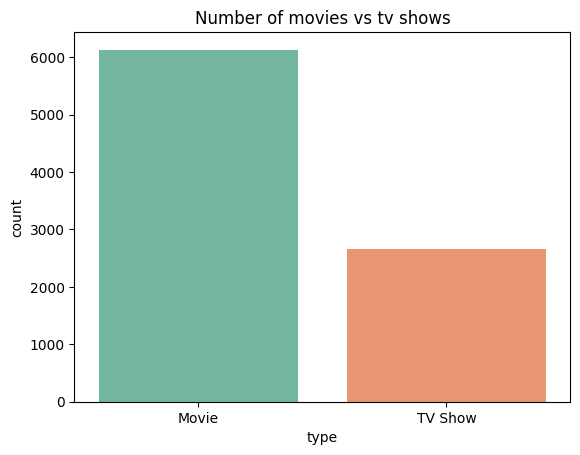

In [10]:
sns.countplot(x='type',hue = 'type',data = df,palette='Set2')
plt.title('Number of movies vs tv shows')
plt.show()


2. Content Added Over Time

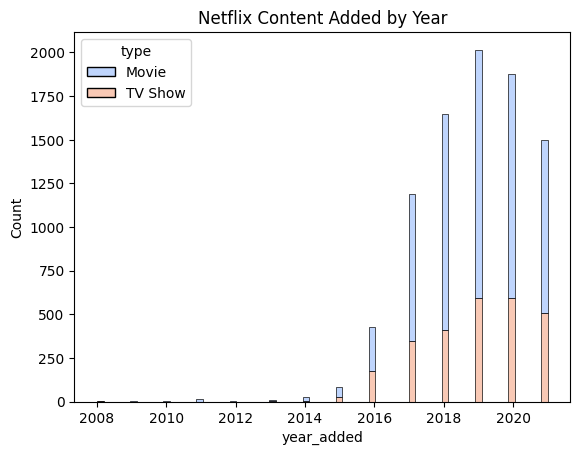

In [11]:
df['year_added'] = df['date_added'].dt.year
sns.histplot(data=df, x='year_added', hue='type', multiple='stack', palette='coolwarm')
plt.title('Netflix Content Added by Year')
plt.show()

3. Top 10 Countries Producing Content

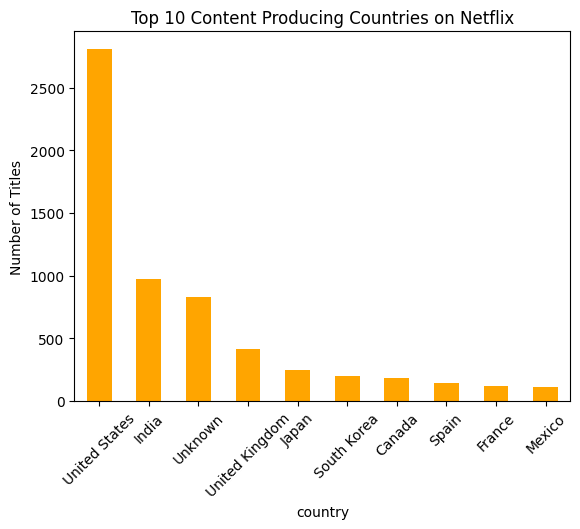

In [12]:
top_countries = df['country'].value_counts().head(10)
top_countries.plot(kind='bar', color='orange')
plt.title('Top 10 Content Producing Countries on Netflix')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.show()

Top Genres on Netflix


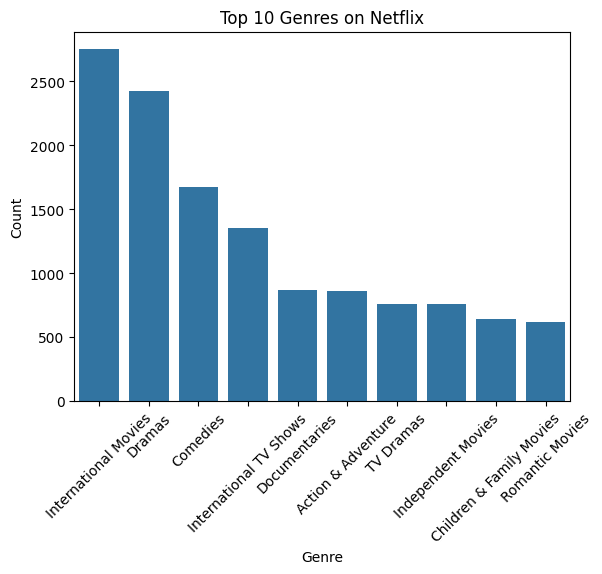

In [13]:
from collections import Counter

genres = df['listed_in'].dropna().apply(lambda x: x.split(', '))
genre_counts = Counter()

for genre_list in genres:
  genre_counts.update(genre_list)

top_genres = pd.DataFrame(genre_counts.most_common(10), columns=['Genre', 'Count'])

# Plot the graph
sns.barplot(x='Genre', y='Count', data=top_genres)
plt.title('Top 10 Genres on Netflix')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

Distribution of ratings


/tmp/ipython-input-14-1475960946.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='rating', order=df['rating'].value_counts().index[:10], palette='Set3')


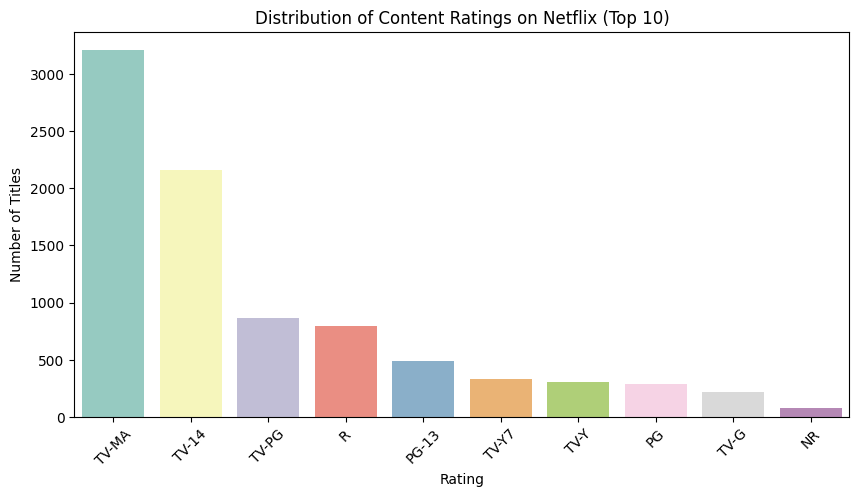

In [14]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='rating', order=df['rating'].value_counts().index[:10], palette='Set3')
plt.title('Distribution of Content Ratings on Netflix (Top 10)')
plt.xlabel('Rating')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.show()


Movie Durations


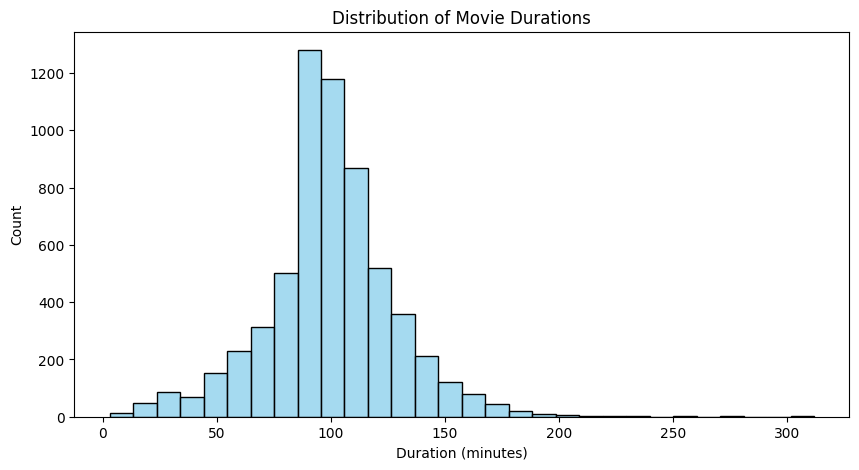

Average Movie Duration: 100 minutes


In [15]:
# Filter only movies
movies_df = df[df['type'] == 'Movie'].copy()

# Extract duration in minutes
movies_df['duration_mins'] = movies_df['duration'].str.extract('(\d+)').astype(float)

# Plot distribution
plt.figure(figsize=(10,5))
sns.histplot(movies_df['duration_mins'], bins=30, color='skyblue')
plt.title('Distribution of Movie Durations')
plt.xlabel('Duration (minutes)')
plt.ylabel('Count')
plt.show()

# Optional: Average duration
print("Average Movie Duration:", round(movies_df['duration_mins'].mean()), "minutes")


TV-Drama Seasons

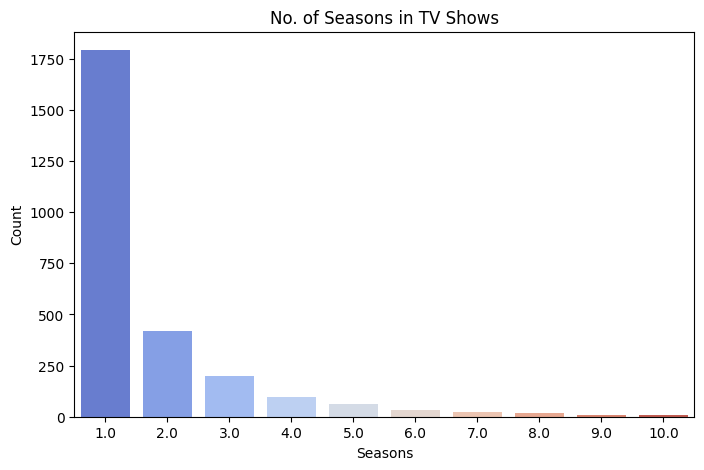

In [26]:
# Filter only Dramas
tv_df = df[df['type']=='TV Show'].copy()
# Extract seasons
tv_df['Seasons'] = tv_df['duration'].str.extract('(\d+)').astype(float)

# Plot
plt.figure(figsize=(8,5))
sns.countplot(data = tv_df, x = 'Seasons',order = tv_df['Seasons'].value_counts().index[:10], palette ='coolwarm')
plt.title('No. of Seasons in TV Shows')
plt.xlabel('Seasons')
plt.ylabel('Count')
plt.show()


INSIGHTS:
* Most content is Movies, especially from the USA and India

* Top genres include Dramas, International Movies, Comedies

* Majority of content is TV-MA (mature audiences)

* Most movies are ~90 minutes; most shows have 1–2 seasons